In [1]:
from CyNN.CyNN import *
import matplotlib.pyplot as plt

### Load Example Images
The following images are flourescense microscopy images microtubulues of mouse embryonic fibroblasts on a micropattern.

_Image credit: Anna Blob, Köster Lab Univ. Göttingen_

In [2]:
image1 = np.asfarray(Image.open("example_img/7-cell_C002T001.tif"))

Text(0.5, 0.98, 'MEF Microtubule Networks - Fluorescence Microscopy Images')

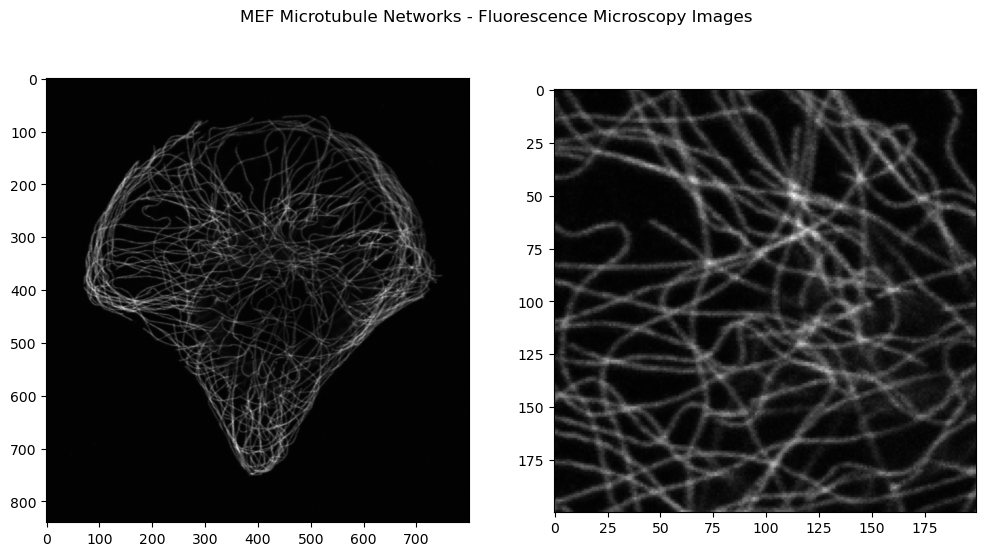

In [3]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image1,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image1[200:400,200:400],cmap='gray')
plt.suptitle("MEF Microtubule Networks - Fluorescence Microscopy Images")

### Train or Load a Filament Reconstruction Model
We generate some trainign data with the default forward model for fluorescence micrsopscopy imaging and random filament configurations. To see how to specify the forward model check out `Forward Model Demo.ipynb`

In [4]:
# train a model if necessary
#fixed_model = FilamentReconstructor.train_model(10000,(80,80,16),6)

In [5]:
# save the model
#fixed_model.save("models/fixed_80")

In [6]:
# load the model again
fixed_model = FilamentReconstructor.load_model("models/fixed_80")

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2024-02-23 00:16:30.129531: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-23 00:16:30.129628: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Apply the Model

In [7]:
C1 = Cell(image1,{"name":"fixed-cell-7"},verbose=True)

[INFO] on cell {'name': 'fixed-cell-7'}: applying CNN.
[INFO] on cell {'name': 'fixed-cell-7'}: segmenting CNN output.
[INFO] on cell {'name': 'fixed-cell-7'}: refining filaments.
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
[INFO] on cell {'name': 'fixed-cell-7'}: calculating refined curvature/orientation.


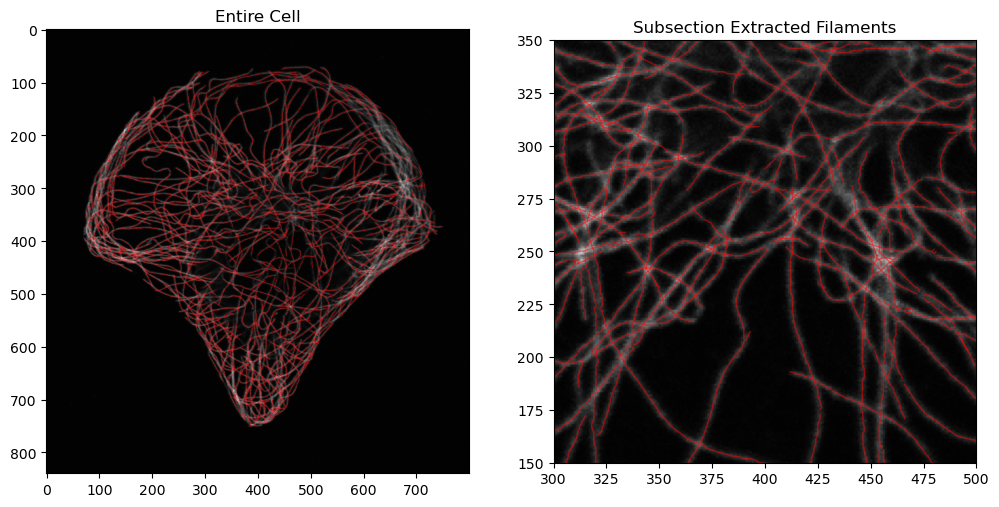

In [8]:
xshift = 20
yshift = 20
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image1,cmap='gray')
plt.title("Entire Cell")
for c in C1.filament.curves:
    plt.plot(c.y+yshift,c.x+xshift,linewidth=0.5,alpha=0.5,c='red')
plt.subplot(1,2,2)
plt.xlim(300,500)
plt.ylim(150,350)
plt.imshow(image1,cmap='gray')
plt.title("Subsection Extracted Filaments")
for c in C1.filament.curves:
    if c.N > 3:
        plt.plot(c.y+yshift,c.x+xshift,linewidth=1.0,alpha=0.5,c='red')

### Single Filament Curvature estimation

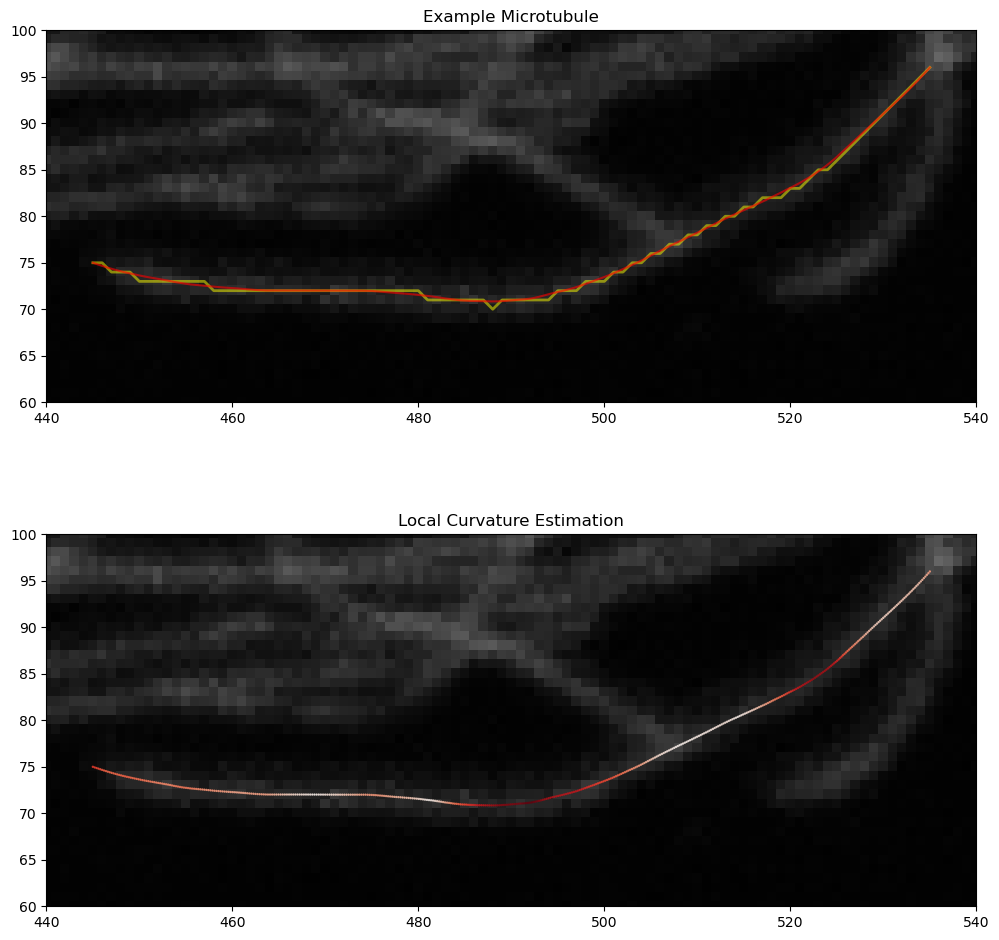

In [13]:

cv = C1.filament.curves[0]
plt.figure(figsize=(12,12))

xoff = -20
yoff = -20

plt.subplot(2,1,1)
plt.xlim(440,540)
plt.ylim(60,100)
plt.imshow(image1,cmap='gray')
plt.title("Example Microtubule")
plt.plot(cv.yold-yoff,cv.xold-xoff,linewidth=2.0,alpha=0.5,c='yellow')
plt.plot(cv.y-yoff,cv.x-xoff,alpha=0.6,c='r')

plt.subplot(2,1,2)
plt.xlim(440,540)
plt.ylim(60,100)
plt.imshow(image1,cmap='gray')
plt.title("Local Curvature Estimation")
plt.scatter(cv.y-yoff,cv.x-xoff,s=0.5,alpha=0.8,cmap='Reds',c=np.abs(cv.k))

In [ ]:
# TODO : adjust cutoff in cp_analysis